In [1]:
import numpy as np
from scipy import stats as scs
from matplotlib import pyplot as plt

# Bagging and Random Forests

## Objectives

TODO TODO

## Ensemble methods

Combining multiple different models into a single model is called **ensembling**. Though ensemble method can be complicated, the most basic ensemble methods are very simple.

### Example: guessing jellybeans.

Imagine a contest to guess the number of jellybeans in a 5-gallon jar. Three people make guesses:

* A: 8246
* B: 8094
* C: 7200

Imagine that the true value is 7715 jelly beans. In this case, B is closest at 379 off, and would win. However, before the contest is over, A and C decide to team up; they will average their scores, and split the jelly beans if they win. Their average score is only 16 off; they win and split the difference.

Were A and C clever, or did they get lucky?

If we assume that each contestant's guess is a normal distribution with $\mu = n_{beans}$ and the same unknown variance $\sigma^2$, then the distribution of the result of averaging the guesses of $n_{ensembler}$ contestants is

$$X = \mathcal{N}(n_{beans}, \frac{\sigma^2}{n_{ensembler}})$$

In other words if the ensembled estimators are unbiased ((DEFINE; excuse the huge assumption)), then an ensemble can contrain its expected error to an arbitrarily small value with an arbitrarily large number of ensembled models. 

(I'll leave it as an exercise to the student whether the _expected value_ of the winnings for an ensemble contestant beats a lone contestant. Hint hint: the closed form solution is very challenging, but simulating it is pretty straightforward).

### Example: fallable voters

Another contest: you have to guess whether a leader will do a good job. Each person, when asked about whether someone is a good leader or not, is only right 55% of the time.

Let's assume that the candidate leader is qualified, and then take votes at a 55% rate of correctness.

In [2]:
np.random.seed(560)

In [3]:
n = 1000
votes = scs.bernoulli(p=0.55).rvs(n)*2 - 1

Let's take a look at some votes:

In [4]:
votes[0:100]

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1])

We can make a plot to look at more of them at once:

[Text(0, 0, 'incorrect vote'), Text(0, 0, 'correct vote')]

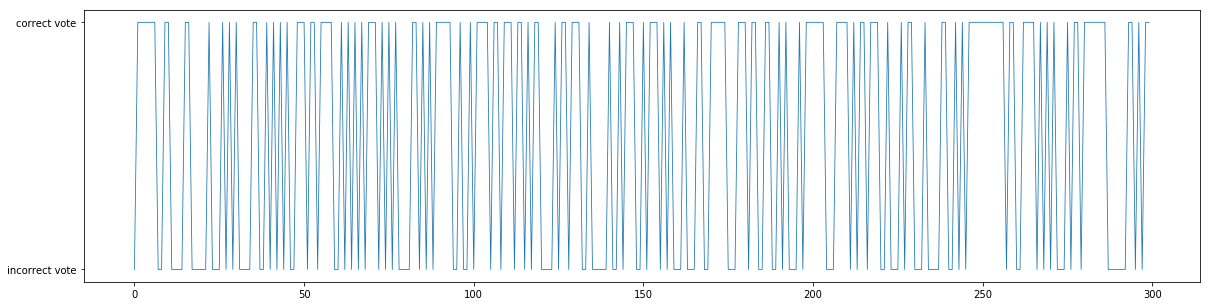

In [5]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(votes[0:300], lw=0.8)
ax.set_yticks([-1, 1])
ax.set_yticklabels(["incorrect vote", "correct vote"])

We can take a tally of votes and keep the running tally on the x-axis:

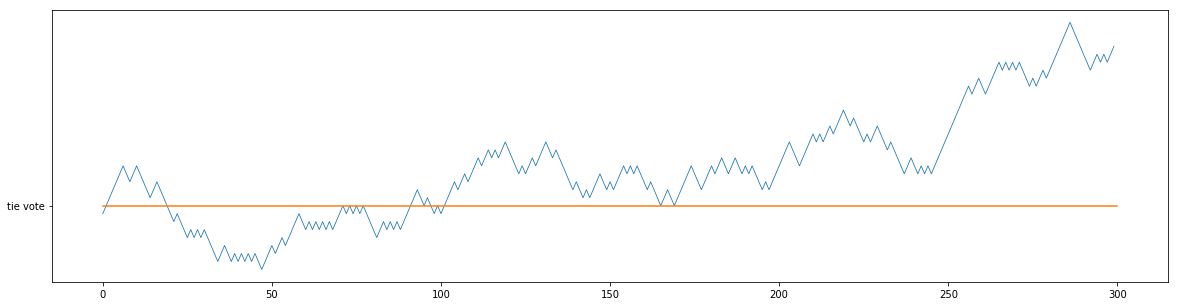

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.cumsum(votes[0:300]), lw=0.8)
ax.set_yticks([0])
ax.set_yticklabels(["tie vote"])
#PUT A LEGEND IN HERE
ax.plot((0,300),(0,0))

In this case, for nearly the first 100 votes, the incorrect votes were winning. Eventually the correct votes took over. Maybe we just got lucky though? Let's repeat this experiment a large number of times and see the fraction of time the vote has the correct outcome:

In [7]:
# n_estimators = 300

# fig, ax = plt.subplots(figsize=(10,5))
# for i in range(100):
#     votes = scs.bernoulli(p=0.55).rvs(n_estimators)*2 - 1
#     ax.plot( votes.cumsum()/(1+np.arange(n_estimators)), lw=0.2, c="black", alpha=0.5 )
# ax.set_ylim(-1,1)
# ax.plot((0,n),(0,0), color="red")
# ax.set_yticks([-1,1])
# ax.set_xlim(0,n_estimators)

Text(0.5, 0, 'number of votes tallied')

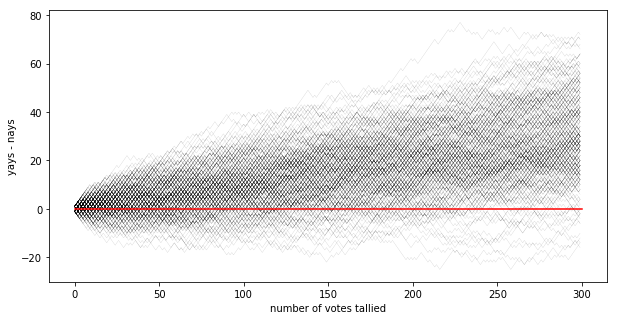

In [8]:
n_revotes = 300

fig, ax = plt.subplots(figsize=(10,5))
totals = []
for i in range(300):
    votes = scs.bernoulli(p=0.55).rvs(n_revotes)*2 - 1
    totals.append( votes.sum() )
    ax.plot( votes.cumsum(), lw=0.2, c="black", alpha=0.3 )
    
ax.plot((0,300),(0,0), c="red")
ax.set_ylabel("yays - nays")
ax.set_xlabel("number of votes tallied")
# ax.set_ylim(-1,1)
# ax.plot((0,n),(0,0), color="red")
# ax.set_yticks([-1,1])
# ax.set_xlim(0,n_estimators)

If we take a slice along the y axis at 300 votes and visualize it as a histogram, we see a familiar bell curve:

In [104]:
# vote_tallies = []
# for i in range(1000):
#     votes = (scs.bernoulli(p=0.55).rvs(300)*2 - 1).sum()
#     vote_tallies.append( votes )

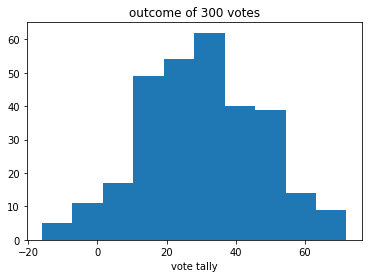

In [105]:
fig, ax = plt.subplots()
ax.hist( totals, bins=10 )
ax.set_title("outcome of 300 votes")
ax.set_xlabel("vote tally")
#ax.set_xlim(-40, 80)
None

With 300 votes, we're still wrong some of the time.

In [116]:
f"{100*(np.array(totals)<0).sum() / len(totals)}% of the time"

'4.333333333333333% of the time'

Not bad, but we can do better.